<a href="https://colab.research.google.com/github/kulkarnivinayv/Play-Store-Data-Analysis/blob/main/Individual_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Apps for mobile devices (specially for Andriod mobiles) are all over the place. Every mobile user is getting interest in how this app is useful to me.They're simple to make and may be profitable. As a result of these two considerations, an increasing number of applications are being produced. </b>

## <b> In this notebook, I compared over ten thousand apps in Google Play across several categories to conduct a full study of the Google play industry.  I will  search for patterns in the data to develop business and marketing initiatives.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

First of all we will understand the provided datasets, included two .csv files as follow: 

 

1.   **Play Store Data.csv** :-  provides all of the information on the apps available on Play Store. A particular app has 13 distinct characteristics.
2.   **User Reviews.csv** :-Each app has 100 reviews, with the most useful ones shown first. Each review's text was pre-processed and given three new characteristics: sentiment (positive, negative, or neutral), sentiment polarity, and sentiment subjectivity.

Now let's dive in Detail analysis of both the datasets and how the analysis is helpful for tech lovers.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
App_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Vinay_Capston_Project_Play_Store_Analysis/Play Store Data.csv')


In [ ]:
AD = App_Data.copy()
AD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
AD.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

In [ ]:
AD.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

It is found that I cant process further without preprocessing and removing these null values. 

I saw that the dataset contains many Null or missing values. The column Rating, Type , Content Rating , Current Ver , andAndroid Ver contains 1474, 1, 1, 8, and 3 missing values respectively.

In [ ]:
def printinfo():
    temp = pd.DataFrame(index=AD.columns)
    temp['data_type'] = AD.dtypes
    temp['null_count'] = AD.isnull().sum()
    temp['unique_count'] = AD.nunique()
    return temp

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


Now I have some useful information about the dataset. i.e., we can now see the missing number of values of any attribute, its unique count, and its respective data types.

Start the process of data cleaning, lets start with the column **Rating**

In [ ]:
modeValueRating = AD['Rating'].mode()
AD['Rating'].fillna(value=modeValueRating[0], inplace = True)

Now, we can move on to the column **Content Rating** and **Type** :

In [ ]:
AD[AD['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
AD.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
AD[AD['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.4,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
AD['Type'].fillna("Free", inplace = True)

By, looking only at these rows it is not easy to say what's actually missing in this row. let us have a look at all of its near rows data. For this purpose, we have ***iloc*** and ***loc*** function.

In [ ]:
AD.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up


We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

In [ ]:
AD.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

Finally, after fixing all the missing values, we should have a look at our data frame, We defined a function as **printinfo()** . So, it’s time to use that function.

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values.

# *Now we are done with the data cleansing part and in a state to start the work for data preparation*

Columns like **Reviews**, **Size**, **Installs**, & **price** should have an intor floatdatatype, But here we can see of objecttype, So let’s convert them to their respective correct type.

Starting with the column Reviews , converting its type to int .

In [ ]:
AD['Reviews'] = AD.Reviews.astype(int)

We can see that the changes have taken its effect or not by calling our printinfo() function.

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Now, the reviews column has been converted to int type, so now we can move to the Column: Size
Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float .

Removing the + Symbol:

In [ ]:
# Removing the + Sign
AD['Size'] = AD.Size.apply(lambda x: x.strip('+'))    

Removing the , symbol:

In [ ]:
# For removing the `,`
AD['Size'] = AD.Size.apply(lambda x: x.replace(',', ''))

Replacing the M symbol by multiplying the value with 1000000 and Replacing the k by multiplying the value with 1000

In [ ]:
# For converting the M to Mega
AD['Size'] = AD.Size.apply(lambda x: x.replace('M', 'e+6'))

# For convertinf the K to Kilo
AD['Size'] = AD.Size.apply(lambda x: x.replace('k', 'e+3'))

Replacing the **Varies with device** value with **Nan** :

In [ ]:
AD['Size'] = AD.Size.replace('Varies with device', np.NaN)

Now, finally converting all these values to numeric type:

In [ ]:
# Converting the string to Numeric type
AD['Size'] = pd.to_numeric(AD['Size']) 

So, after performing all of these operations, we should have a detailed look at that column, so yes again we will call our useful function which we defined. i.e., **printinfo()**

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Since we converted the Varies with device value to Nan , so we have to do something with those set of Nan values data. It will be a better idea to drop the Rows of the column Size having Nanvalues because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.

In [ ]:
AD.dropna(subset = ['Size'], inplace=True)

Column: Installs :
To convert this column from object to integer type. First of all, we will need to remove the +symbol from these values.

In [ ]:
AD['Installs'] = AD.Installs.apply(lambda x: x.strip('+'))

and then let’s remove the , symbol from the numbers.

In [ ]:
AD['Installs'] = AD.Installs.apply(lambda x: x.replace(',', ''))

Lastly, we can now convert it from string type to numeric type, and then have a look at our dataset.

In [ ]:
AD['Installs'] = pd.to_numeric(AD['Installs'])

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


So, now we are only left with the Price column.
Column: Price :
Converting this column from objectto Numeric type.

In [ ]:
AD['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 87, dtype: int64

The values contain a special symbol $ which can be removed and then converted to the numeric type.

In [ ]:
AD['Price'] = AD.Price.apply(lambda x: x.strip('$'))

In [ ]:
AD['Price'] = pd.to_numeric(AD['Price'])

# After fixing all the issues, we should have a final look at the data frame.

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


*Now, we are finally done. In this section Data Preparation and Cleaning. We can see that the original dataset contained 10841 Rows and 13 Columns. It contained App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Curernt Ver, and Android VerColumns. But after cleansing the dataset and dropping the unwanted rows and columns having Null Values and Garbage data from the data frame, we are left with 8434 Rows and 10 Columns.*



                                                        ----------------------------------------------------------------------



# **Exploratory Analysis and Visualization**

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Now it is time to unveil the real strength of data analysis, i.e., to get an insight, and learn the trend, pattern and get answers to some of the questions related to the dataset.



# **Can we see what are the top categories in the play store, which contains the highest number of apps? Well, let us try to.**

In [ ]:
y = AD['Category'].value_counts().index
x = AD['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

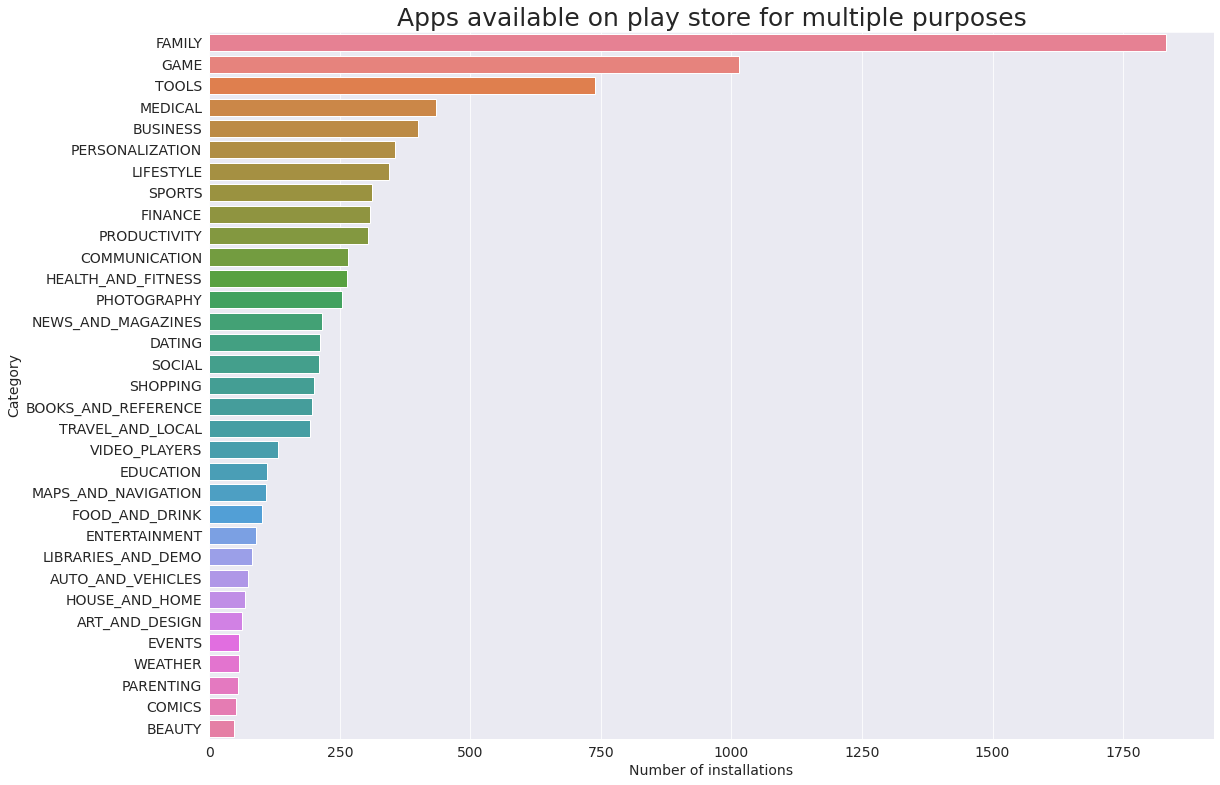

In [ ]:
# We have defined our x and y axis. Let us plot and see

plt.figure(figsize=(18,13))
plt.xlabel("Number of installations")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Apps available on play store for multiple purposes", fontsize = 25);

So there are all total of 33 categories in the dataset from the above output we can come to the conclusion that in the play store most of the apps are under Family & Game category and least are of Beauty & Comics Category.

# **Which category of Apps from the ‘Content Rating’ column is found more on the play store?**

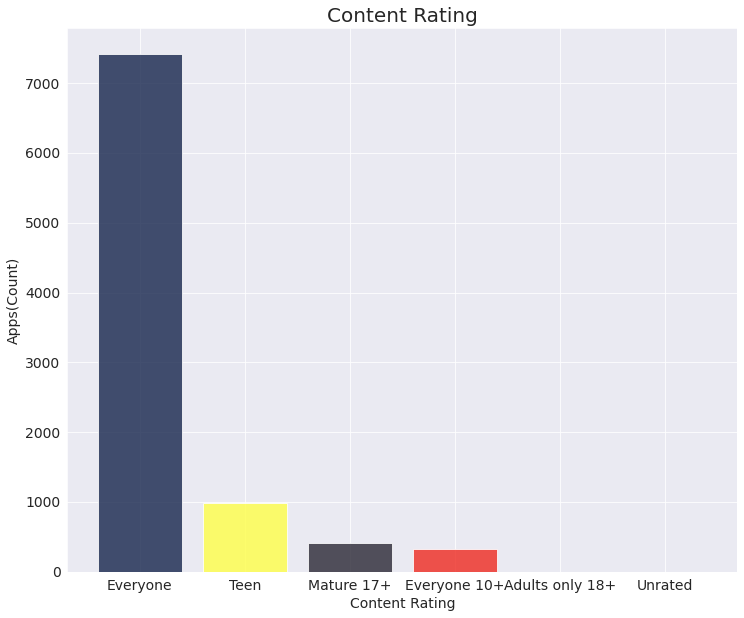

In [ ]:
x2 = AD['Content Rating'].value_counts().index
y2 = AD['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

From the above plot, we can see that the Everyone category has the highest number of apps.

**Let’s have a look at the distribution of the ratings of the data frame.**

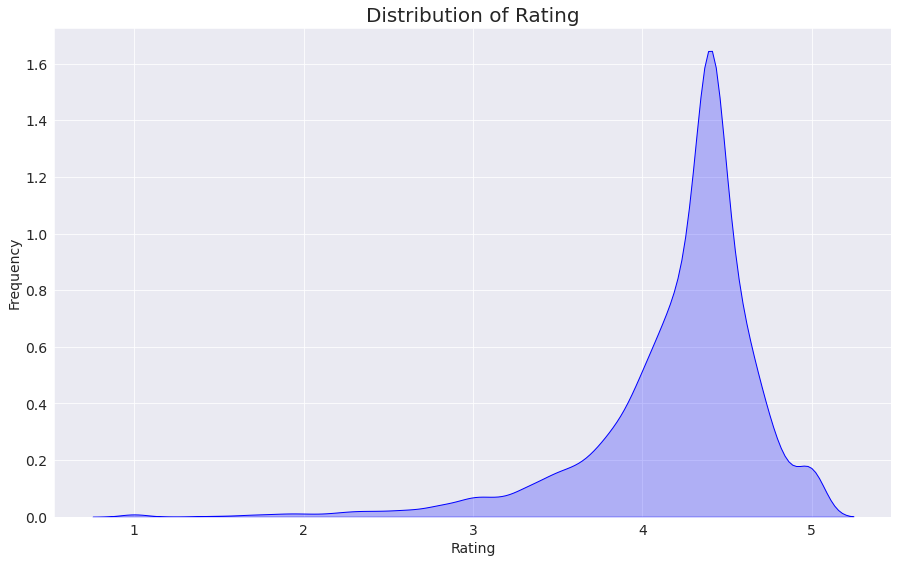

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(AD.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8.

# **Let’s plot a visualization graph to view what portion of the apps in the play store are paid and free.**

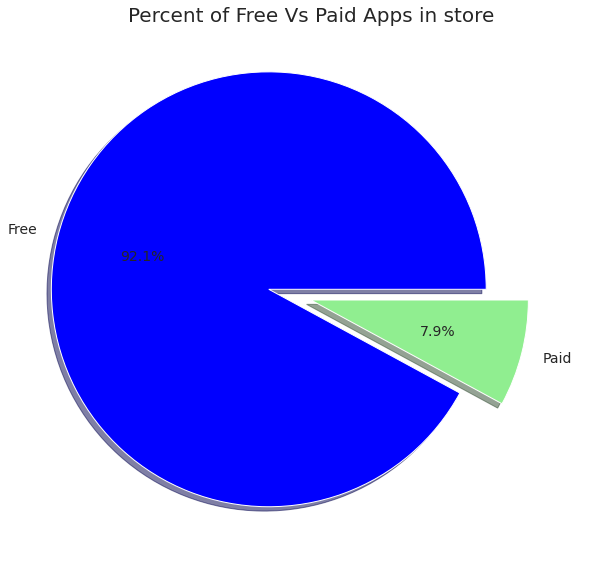

In [ ]:
plt.figure(figsize=(10,10))
labels = AD['Type'].value_counts(sort = True).index
sizes = AD['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

From the above graph, we can see that 92%(Approx.) of apps in the google play store are free and 8%(Approx.) are paid.

# **Which category App’s have the most number of installs?**

To answer this question we need to create a separate data frame out of our googlestore_df data frame which will contain a grouped value by Category and Installs.

In [ ]:
highest_Installs_df = AD.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

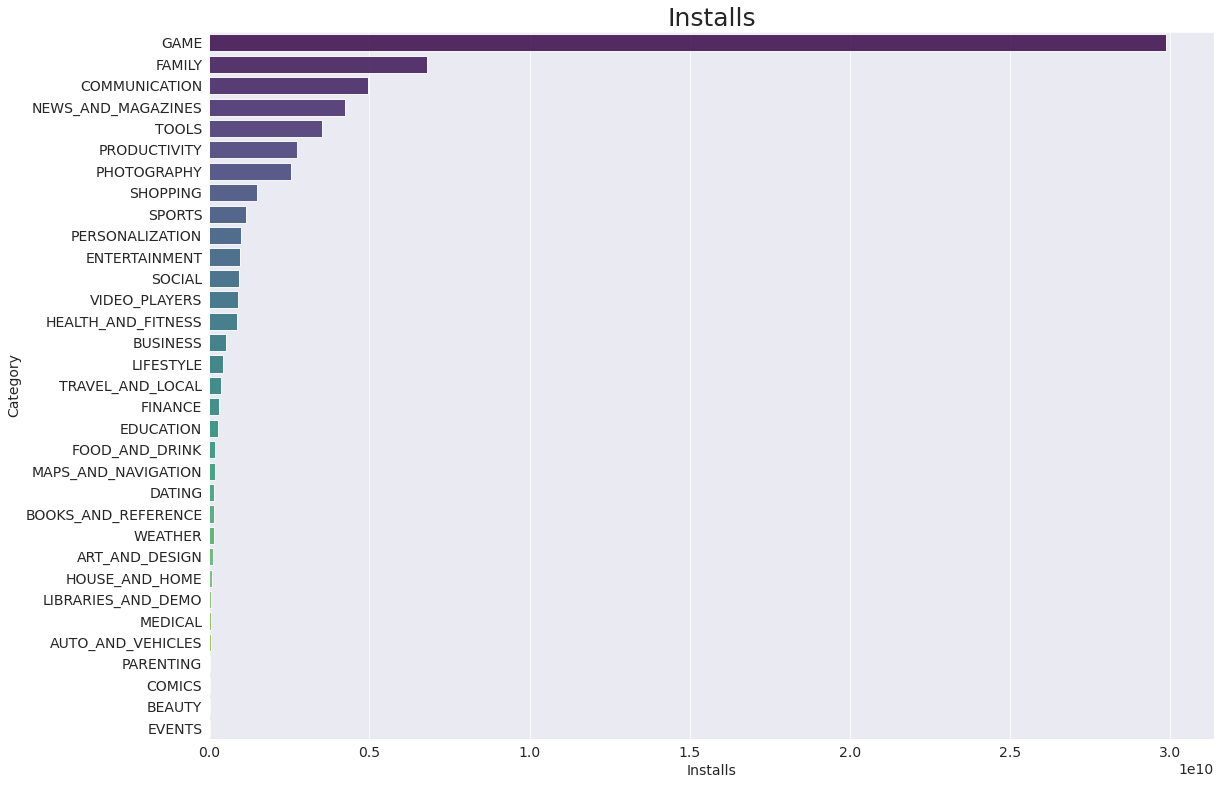

In [ ]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")

graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

*From the above visualization, it can be interpreted that the top categories with the highest installs are Game, Family, Communication, News & Magazines, & Tools.*

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

We have done somewhat a good number of exploratory data analysis till now and in a state to finally answer some of the most common and in-demand questions which every App developer or any business company will love to know.

# **Asking and Answering Questions**

# **`1. What are the Top 5 installed apps in any category? `**


So, we have to be able to answer this not only for a single category but for many, i.e., we will need to define a function which should be able to return us a nice plot for any Category the name provided by any user as an argument to it.

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = AD[AD['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(5)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 5 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

After we are done with defining the function, it’s time to check and see if everything is working fine. So let’s test it by passing Sports category to the above-defined function.

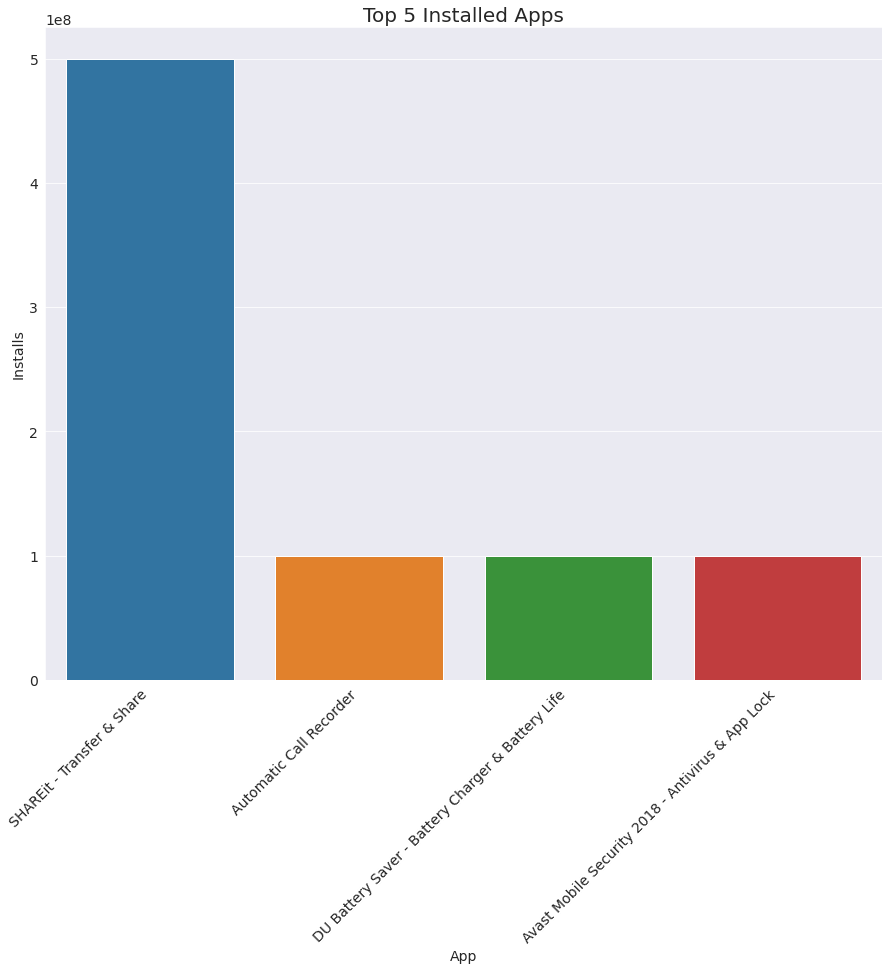

In [ ]:
findtop10incategory('Tools')

From above graph it is clear that the Pou and Candy Crush Saga games are most popular games. Hence they are showing highest height in graph.

# **2. Which are the top 10 expensive Apps in the play store?**

We will again need to create a separate data frame.

In [ ]:
# top10PaidApps
top10PaidApps = AD[AD['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
top10PaidApps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance
5364,I am rich (Most expensive app),FINANCE,4.1,129,2700000.0,1000,Paid,399.99,Teen,Finance
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.4,0,40000000.0,0,Paid,399.99,Everyone,Lifestyle
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100,Paid,399.99,Everyone,Entertainment
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000000.0,1000,Paid,399.99,Everyone,Finance
5369,I am Rich,FINANCE,4.3,180,3800000.0,5000,Paid,399.99,Everyone,Finance


From the above data frame, we will need to drop an app name, because its’ name will be creating a mess in the plot.

In [ ]:
top10PaidApps_df = top10PaidApps[['App', 'Installs']].drop(9934)

So Finally let’s plot and visualize the top 10 paid apps on the play store.

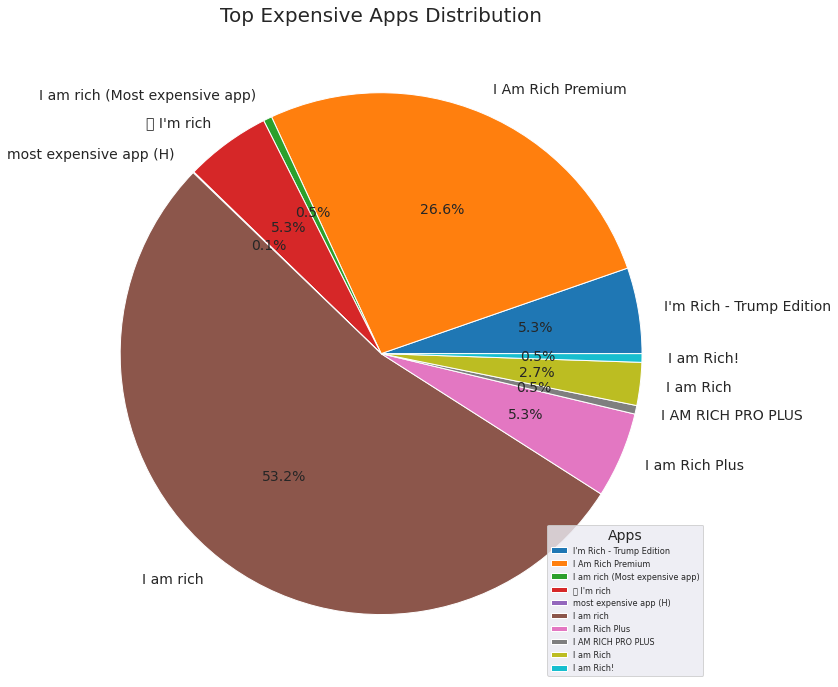

In [ ]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

From the above graph, we can interpret that the App I am rich is the most expensive app in the google play store followed by I am Rich Premium. we also had to drop one-row data for this visualization because the language of the app was Chinese and it was messing with the pie chart, visualization.

# **3. Which are the Apps with the highest number of reviews?**

In [ ]:
Apps_with_Highest_rev = AD.sort_values(by='Reviews', ascending=False).head(20)
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade


From the above data frame we can interpret, and come to the conclusion that the Apps like Clash of Clans, Subway Surfers, Clash Royale, and Candy Crush Saga has the highest number of reviews on google play store.

# **4. What are the count of Apps in different genres?**

By creating a data frame, let’s define our x and y axis, which will be required for plotting the graph.

In [ ]:
topAppsinGenres = AD['Genres'].value_counts().head(50)

In [ ]:
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

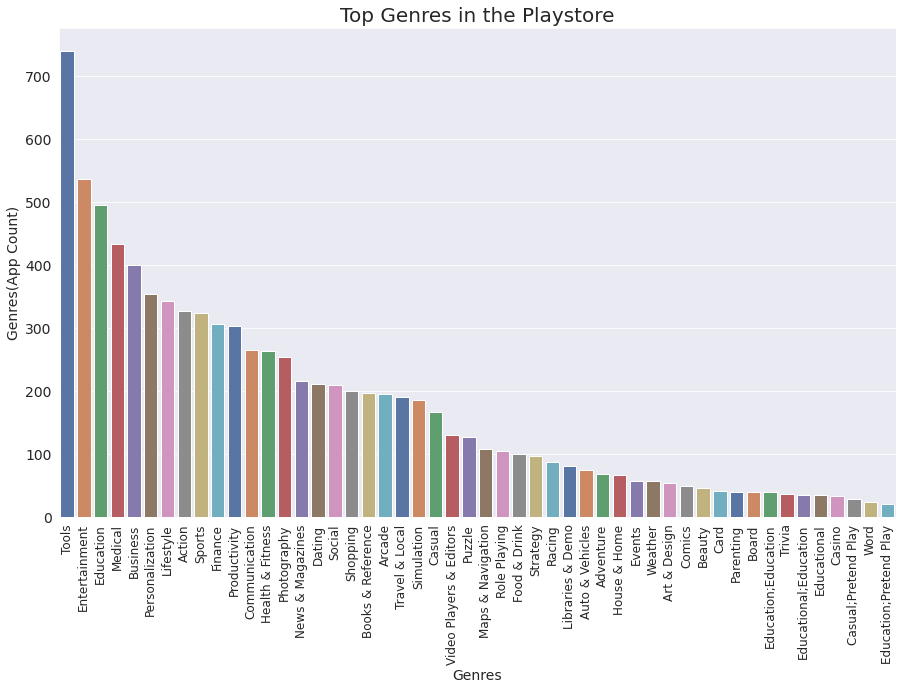

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

From the above visualization, we can see that the Highest Number of Apps found in the Tools and Entertainment genres followed by Education, Medical and many more.

# **5. Which are the apps that have made the highest-earning?**

For answering these questions we will need to perform some extra operation to the data frame, i.e., we will need to create a separate data frame, and then multiply the Price column and the Installs column in order to get the earning of any particular app. So, let's start the process.

In [ ]:
Paid_Apps_df = AD[AD['Type'] == 'Paid']

Now from the above data frame, we will need to separate out the columns which we will require.

In [ ]:
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]

We can now add a separate column Earnings to our new data frame which we will create by multiplying the two-column Price and Installs .

In [ ]:
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];

In [ ]:
# Sort the above data by Earnings and Price.

earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

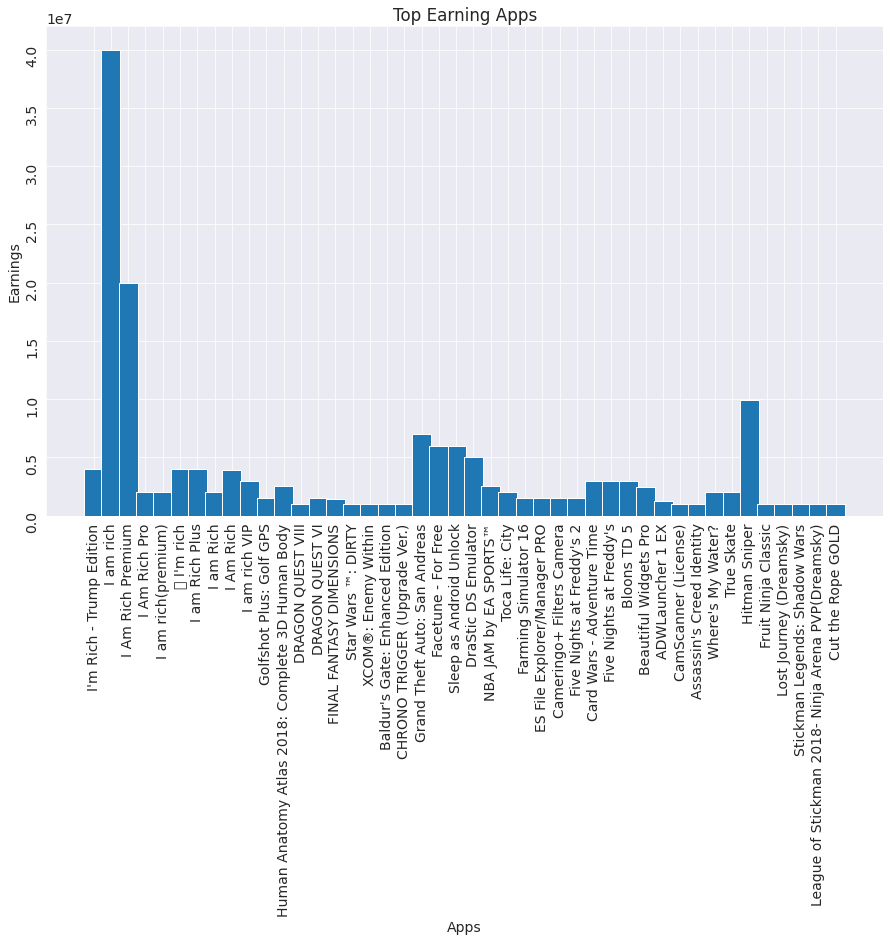

In [ ]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

The top five apps with the highest earnings found on google play store are:-

*   I am Rich
*   I am Rich Premium
*   Hitman Sniper
*   Grand Theft Auto: San Andreas
*   Facetune - For Free

*After Analyzing the dataset I have got answers to some of the serious & interesting question which any of the android users would love to know.*


1.   **Top categories on Google Playstore**
2.   **Which category of Content are found more?**
3.   **Distribution of the ratings of the apps?**
4.   **What percentage of apps are Free and Paid?**
5.   **Which category of App's have most number of installs?**
6.   **What are the Top 10 installed apps in different category?**
7.   **Which are the top expensive Apps?**
8.   **Which are the Apps with highest number of reviews?**
9.   **Count of Apps found in different genres?**
10.  **Which are the apps that have made the highest earning?**


# **Analysis of Review dataset**

In [ ]:
Review_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Vinay_Capston_Project_Play_Store_Analysis/User Reviews.csv')
RD = Review_Data.copy()

# Remove the Null values from Review dataset 

In [ ]:
RD.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
RD = RD.dropna()
print(RD.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


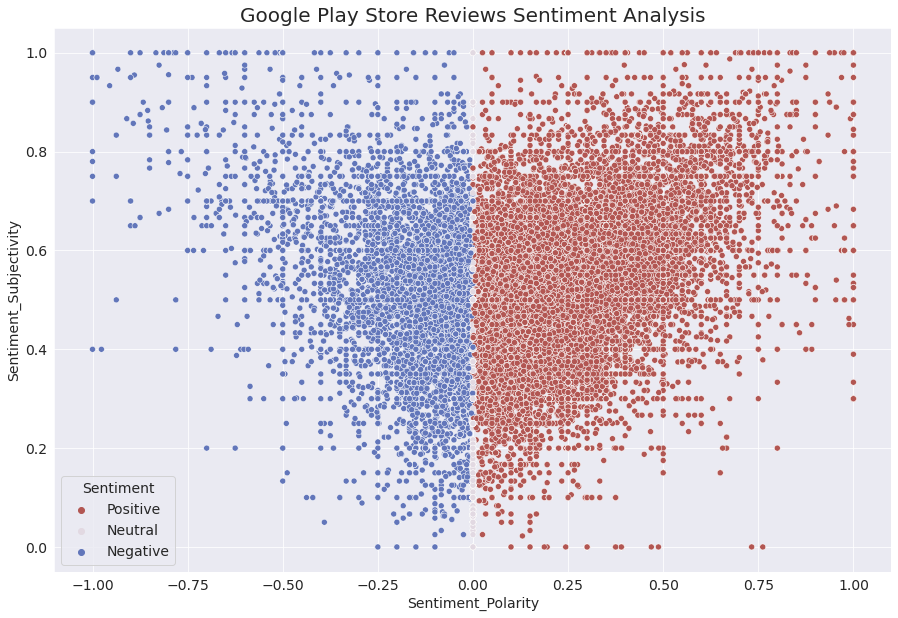

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(RD['Sentiment_Polarity'], RD['Sentiment_Subjectivity'], 
                hue = RD['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [ ]:
# Drop duplicates
apps = RD.drop_duplicates()
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
apps = AD.drop_duplicates()

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

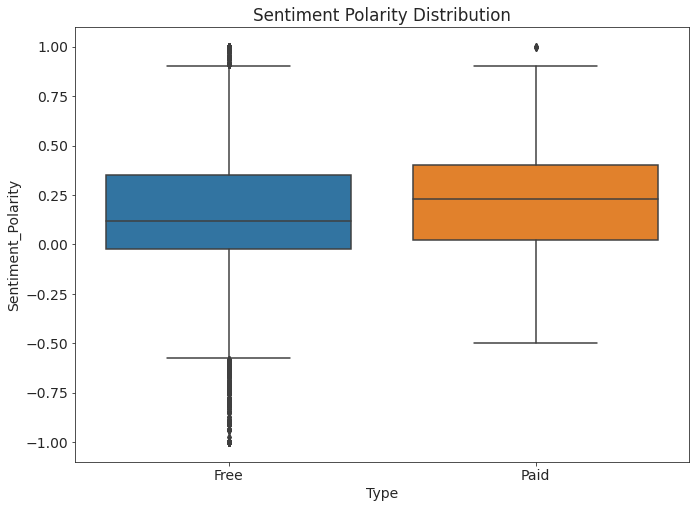

In [ ]:
# Join and merge the two dataframe
merged_df = pd.merge(apps, RD, on='App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

In [ ]:
RD['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [ ]:
#CHANGING THE TARGET COLUMNS TO NUMERICAL VALUES BETWEEN 0-3
RD['Sentiment'] = [0 if i == 'Positive' else 1 if i == 'Negative' else 2 for i in RD['Sentiment']]
RD.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,0,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,0,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,0,0.40,0.875000
4,10 Best Foods for You,Best idea us,0,1.00,0.300000
5,10 Best Foods for You,Best way,0,1.00,0.300000
6,10 Best Foods for You,Amazing,0,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",2,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,2,0.00,0.000000
10,10 Best Foods for You,good you.,0,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,0,0.20,0.100000


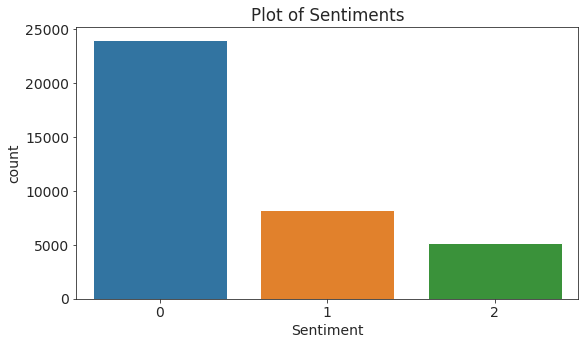

In [ ]:
#VISUALIZING OUR TARGET VALUES
sns.countplot(RD['Sentiment'])
plt.title("Plot of Sentiments")
plt.show()

# **Inferences and Conclusion**

# *After the completion of my project I have learned and got exposure to different tools and techniques in data analysis. I was able to complete the project successfully with the help of tools like Python, Pandas, Matplotlib, Numpy, Seaborn. Also I learned different techniques like Data Cleaning, Data Preparation, Data Exploration and visualization, and Data Interpretation. Lastlty I would like to thank you AlmaBetter team to inspire and support me for doing this small EDA.*